In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import  seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


In [2]:
data=pd.read_csv('Loan_data.csv')#reading the dataset

In [3]:
len(data)

614

In [4]:
data.describe()#summary of the dataset

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [6]:
data.isnull().sum()#chekcing for null values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
"""Filling the null values in the dataset"""
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(),inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mean(),inplace=True)

In [8]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Gender'>

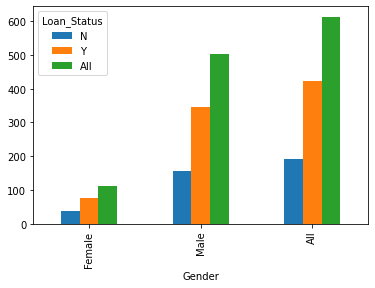

In [10]:
pd.crosstab(data['Gender'],data['Loan_Status'],margins=True).plot(kind="bar")

<AxesSubplot:xlabel='Gender'>

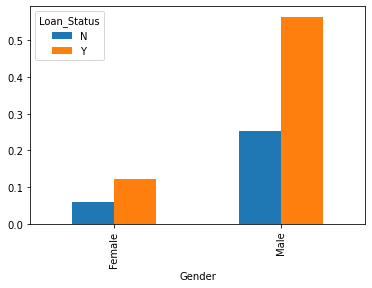

In [11]:
pd.crosstab(data['Gender'],data['Loan_Status'],normalize=True).plot(kind="bar")

{'whiskers': [<matplotlib.lines.Line2D at 0xbb51340>,
 'caps': [<matplotlib.lines.Line2D at 0xbb516a0>,
 'boxes': [<matplotlib.lines.Line2D at 0xbb511c0>],
 'medians': [<matplotlib.lines.Line2D at 0xbb51a00>],
 'fliers': [<matplotlib.lines.Line2D at 0xbb51bb0>],
 'means': []}

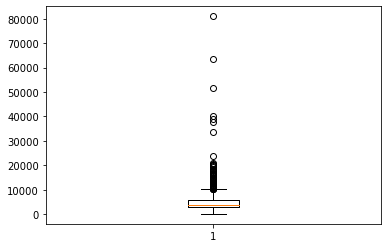

In [12]:
plt.subplot(1,1,1)
plt.boxplot(data['ApplicantIncome'])

In [13]:
data.ApplicantIncome.mean()

5403.459283387622

(array([533.,  59.,  15.,   0.,   4.,   0.,   1.,   1.,   0.,   1.]),
 array([  150.,  8235., 16320., 24405., 32490., 40575., 48660., 56745.,
        64830., 72915., 81000.]),
 <BarContainer object of 10 artists>)

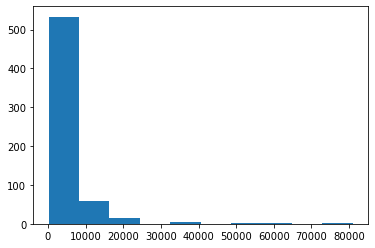

In [14]:
plt.hist(data['ApplicantIncome'])

(array([533.,  59.,  15.,   0.,   4.,   0.,   1.,   1.,   0.,   1.]),
 array([  150.,  8235., 16320., 24405., 32490., 40575., 48660., 56745.,
        64830., 72915., 81000.]),
 <BarContainer object of 10 artists>)

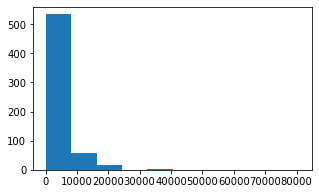

In [15]:
plt.figure(figsize=(5,3))
plt.hist(data['ApplicantIncome'],bins=10)

In [16]:
data.ApplicantIncome.std()

6109.041673387174

In [17]:
max_thres=data.ApplicantIncome.mean()+3*data.ApplicantIncome.std()
max_thres

23730.584303549145

In [18]:
min_thres=data.ApplicantIncome.mean()-3*data.ApplicantIncome.std()

In [19]:
data=data[(data['ApplicantIncome']<max_thres) & (data["ApplicantIncome"]>min_thres)]#removing outlier

In [20]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


{'whiskers': [<matplotlib.lines.Line2D at 0xbc18ec8>,
 'caps': [<matplotlib.lines.Line2D at 0xbc27250>,
 'boxes': [<matplotlib.lines.Line2D at 0xbc18d18>],
 'medians': [<matplotlib.lines.Line2D at 0xbc275b0>],
 'fliers': [<matplotlib.lines.Line2D at 0xbc27760>],
 'means': []}

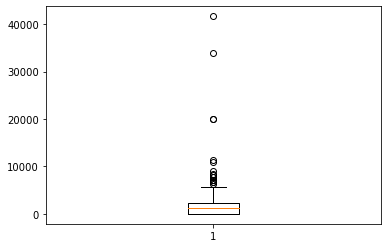

In [21]:
plt.boxplot(data['CoapplicantIncome'])

{'whiskers': [<matplotlib.lines.Line2D at 0xbc4be98>,
 'caps': [<matplotlib.lines.Line2D at 0xbc5a220>,
 'boxes': [<matplotlib.lines.Line2D at 0xbc4bce8>],
 'medians': [<matplotlib.lines.Line2D at 0xbc5a580>],
 'fliers': [<matplotlib.lines.Line2D at 0xbc5a730>],
 'means': []}

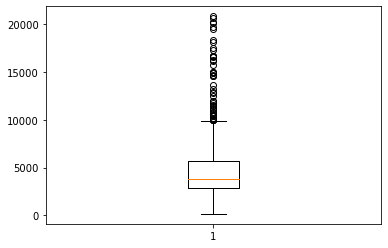

In [22]:
plt.boxplot(data['ApplicantIncome'])

{'whiskers': [<matplotlib.lines.Line2D at 0xbc8e5f8>,
 'caps': [<matplotlib.lines.Line2D at 0xbc8e958>,
 'boxes': [<matplotlib.lines.Line2D at 0xbc8e448>],
 'medians': [<matplotlib.lines.Line2D at 0xbc8ecb8>],
 'fliers': [<matplotlib.lines.Line2D at 0xbc8ee68>],
 'means': []}

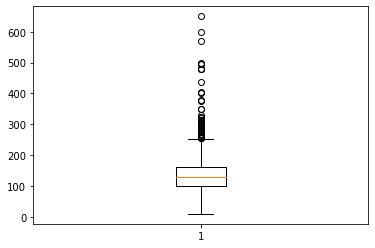

In [23]:
plt.boxplot(data['LoanAmount'])

In [24]:
co_app_max=data.CoapplicantIncome.mean()+3*data.CoapplicantIncome.std()
co_app_max

10447.553047219175

In [25]:
co_app_min=data.CoapplicantIncome.mean()-3*data.CoapplicantIncome.std()
co_app_min

-7177.932849236865

In [26]:
data=data[(data['CoapplicantIncome']<co_app_max) & (data["CoapplicantIncome"]>co_app_min)]

In [27]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [28]:
X=data.drop('Loan_ID',axis=1)

In [29]:
X['Loan_Status']=X['Loan_Status'].replace(('Y','N'),(1,0))

In [30]:
y=X['Loan_Status']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 600, dtype: int64

In [31]:
X=X.drop('Loan_Status',axis=1)

In [32]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban


In [33]:
X['Total_Income']=X['CoapplicantIncome']+X['ApplicantIncome']

In [34]:
X_train=X.drop(['CoapplicantIncome','ApplicantIncome'],axis=1)

In [35]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,5849.0
1,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,6091.0
2,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,3000.0
3,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,4941.0
4,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,6000.0
...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.000000,360.0,1.0,Rural,2900.0
610,Male,Yes,3+,Graduate,No,40.000000,180.0,1.0,Rural,4106.0
611,Male,Yes,1,Graduate,No,253.000000,360.0,1.0,Urban,8312.0
612,Male,Yes,2,Graduate,No,187.000000,360.0,1.0,Urban,7583.0


In [36]:
X_train['Total_Income']=np.log(X_train['Total_Income'])

In [37]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 600, dtype: int64

In [38]:
X=pd.get_dummies(X_train)

In [39]:
X.head(20)

,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,146.412162,360.0,1.000000,8.674026,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,128.000000,360.0,1.000000,8.714568,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,66.000000,360.0,1.000000,8.006368,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,120.000000,360.0,1.000000,8.505323,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,141.000000,360.0,1.000000,8.699515,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
5,267.000000,360.0,1.000000,9.170872,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1
6,95.000000,360.0,1.000000,8.255569,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
7,158.000000,360.0,0.000000,8.619750,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0
8,168.000000,360.0,1.000000,8.618305,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
10,70.000000,360.0,1.000000,8.268732,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


In [40]:
X=X.drop(['Gender_Male','Married_No','Education_Not Graduate','Self_Employed_No','Property_Area_Urban',
],axis=1)

In [41]:
X

,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Gender_Female,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban
0,146.412162,360.0,1.0,8.674026,0,0,1,0,0,0,1,0,0,0
1,128.000000,360.0,1.0,8.714568,0,1,0,1,0,0,1,0,1,0
2,66.000000,360.0,1.0,8.006368,0,1,1,0,0,0,1,1,0,0
3,120.000000,360.0,1.0,8.505323,0,1,1,0,0,0,0,0,0,0
4,141.000000,360.0,1.0,8.699515,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,71.000000,360.0,1.0,7.972466,1,0,1,0,0,0,1,0,1,0
610,40.000000,180.0,1.0,8.320205,0,1,0,0,0,1,1,0,1,0
611,253.000000,360.0,1.0,9.025456,0,1,0,1,0,0,1,0,0,0
612,187.000000,360.0,1.0,8.933664,0,1,0,0,1,0,1,0,0,0


In [42]:
"""resampling on dataset,to make the dataset  balance"""
x_resample,y_resample=SMOTE().fit_resample(X,y.values.ravel())

In [43]:
y.value_counts()

1    415
0    185
Name: Loan_Status, dtype: int64

In [44]:
y_resample=pd.Series(y_resample)
y_resample.value_counts()

1    415
0    415
dtype: int64

In [45]:
"""splitting the dataset into training and testing dataset"""
X_train,x_test,y_train,y_test=train_test_split(x_resample,y_resample,test_size=0.2,random_state=0)

In [46]:
X_train.shape

(664, 14)

In [47]:
sc=StandardScaler()
X_tra=sc.fit(X_train)
X_tra=sc.transform(X_train)
X_tes=sc.transform(x_test)

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lg=LogisticRegression()

In [50]:
model=lg.fit(X_tra,y_train)

In [51]:
pred=model.predict(X_tes)

In [52]:
pred[0:10]

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [53]:
actual_label=np.array(y_test)
actual_label[0:10]

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

In [54]:

accuracy_score(actual_label,pred)#accuracy of the model

0.7951807228915663

In [55]:
model.score(X_tra,y_train)

0.8343373493975904

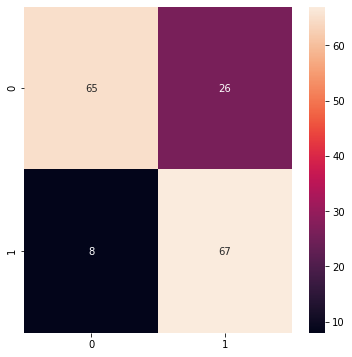

In [56]:
"""Confusion matrix"""

plt.figure(figsize=(6,6))
confusion_matrix=confusion_matrix(actual_label,pred)

sns.heatmap(confusion_matrix,annot=True,fmt='d')
plt.show()

In [57]:
"""Classification Report"""
classfication_report=classification_report(actual_label,pred)
print(classfication_report)

              precision    recall  f1-score   support

           0       0.89      0.71      0.79        91
           1       0.72      0.89      0.80        75

    accuracy                           0.80       166
   macro avg       0.81      0.80      0.80       166
weighted avg       0.81      0.80      0.79       166

